<a href="https://colab.research.google.com/github/vanecornejo/EDP-II/blob/main/M%C3%A9todo%20Crank-Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuación del Calor. Método implícito de Crank-Nicolson**

Tenemos el problema:
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}, \qquad 0 < x < 1 $$

con condiciones de frontera:

$$ u(0,t)=0, \qquad u(1,t)=0 $$

y condición inicial:

$$ u(x,0)=1 - 4(x-\tfrac{1}{2})^2 $$


Para el **Ejercicio 1**, implementamos Crank-Nicolson con $h=0.1$, $k=0.01$ y generamos una tabla igual a la Tabla 2.6.


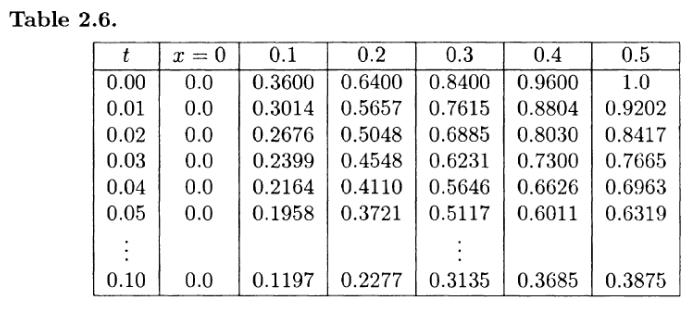

## **Ejercicio 1**  
Implementando el método de Crank-Nicolson con h = 0.1

Recordemos que la discretización lleva al siguiente sistema:

$$ -\frac{r}{2}u_{i-1}^{n+1} + (1+r)u_i^{n+1} - \frac{r}{2}u_{i+1}^{n+1}
=
\frac{r}{2}u_{i-1}^{n} + (1-r)u_i^{n} + \frac{r}{2}u_{i+1}^{n}
$$


In [9]:
# Importamos librerías

import sympy as sp
import numpy as np
from tabulate import tabulate

In [10]:
h = 0.1
x_vals = np.arange(0, 1 + h, h)   # t = 0, 0.1, 0.2, ..., 1
N = len(x_vals) - 1               # N = 10 subintervalos

In [11]:
def f_init(x):
    return 1 - 4*(x - 0.5)**2

u_old = np.array([f_init(x) for x in x_vals])

In [12]:
# Parámetro de Crank

k = 0.01         # paso de tiempo
r = k / h**2     # parámetro clave

In [13]:
# Construimos la matriz A

size = N - 1  # nodos internos
A = sp.zeros(size)

for i in range(size):
    A[i, i] = 1 + r
    if i > 0:
        A[i, i-1] = -r/2
    if i < size - 1:
        A[i, i+1] = -r/2

A_inv = A.inv()

In [14]:
# Hacemos las iteraciones

tabla = []
max_t = 0.10 + 1e-12
t_vals = np.arange(0, max_t + k, k)

for n, t in enumerate(t_vals):

    fila = [round(t, 2)]
    for xi in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
        idx = int(xi / h)
        fila.append(round(float(u_old[idx]), 4))
    tabla.append(fila)

    if abs(t - max_t) < 1e-12:
        break

    b = sp.zeros(size, 1)
    for i in range(1, N):
        b_i = (1 - r)*u_old[i] + (r/2)*(u_old[i-1] + u_old[i+1])
        b[i-1] = b_i

    u_new_internal = A_inv * b

    u_new = np.zeros(N+1)
    u_new[1:N] = [float(u_new_internal[i]) for i in range(size)]

    u_old = u_new.copy()

In [15]:
# Imprimimos los resultados

headers = ["t", "x=0", "0.1", "0.2", "0.3", "0.4", "0.5"]
print(tabulate(tabla, headers=headers, tablefmt="grid"))

# Guardar para Ejercicio 2
u_numeric = tabla

+------+-------+--------+--------+--------+--------+--------+
|    t |   x=0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |
+======+=======+========+========+========+========+========+
| 0    |     0 | 0.36   | 0.64   | 0.64   | 0.96   | 1      |
+------+-------+--------+--------+--------+--------+--------+
| 0.01 |     0 | 0.3014 | 0.5657 | 0.5657 | 0.8804 | 0.9202 |
+------+-------+--------+--------+--------+--------+--------+
| 0.02 |     0 | 0.2676 | 0.5048 | 0.5048 | 0.803  | 0.8417 |
+------+-------+--------+--------+--------+--------+--------+
| 0.03 |     0 | 0.2399 | 0.4548 | 0.4548 | 0.73   | 0.7665 |
+------+-------+--------+--------+--------+--------+--------+
| 0.04 |     0 | 0.2164 | 0.411  | 0.411  | 0.6626 | 0.6963 |
+------+-------+--------+--------+--------+--------+--------+
| 0.05 |     0 | 0.1958 | 0.3721 | 0.3721 | 0.6011 | 0.6319 |
+------+-------+--------+--------+--------+--------+--------+
| 0.06 |     0 | 0.1773 | 0.3372 | 0.3372 | 0.5452 | 0.5731 |
+------+

## **Ejercicio 2**
Para el ejercicio 2, vamos a comparar la solución numérica con la solución real de la tabla 2.7

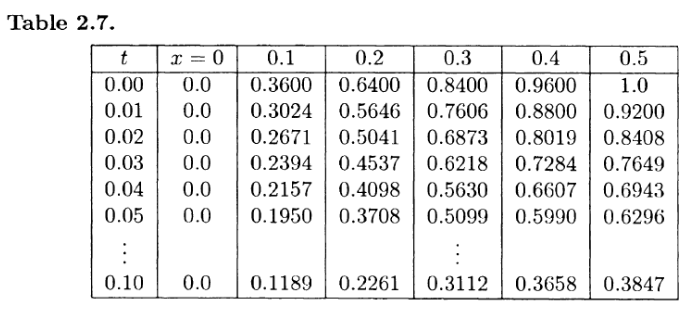

In [16]:
import matplotlib.pyplot as plt

# Tabla de la solución real:
solucion_real = {
    0.00: [0.0, 0.3600, 0.6400, 0.8400, 0.9600, 1.0000],
    0.01: [0.0, 0.3024, 0.5646, 0.7606, 0.8800, 0.9200],
    0.02: [0.0, 0.2671, 0.5041, 0.6873, 0.8019, 0.8408],
    0.03: [0.0, 0.2394, 0.4537, 0.6218, 0.7284, 0.7649],
    0.04: [0.0, 0.2157, 0.4098, 0.5630, 0.6607, 0.6943],
    0.05: [0.0, 0.1950, 0.3708, 0.5099, 0.5990, 0.6296],
    0.10: [0.0, 0.1189, 0.2261, 0.3112, 0.3658, 0.3847],
}

In [17]:
# Solución numérica

x_plot = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
u_num_dict = {}

for row in u_numeric:
    t = round(row[0], 2)
    u_num_dict[t] = row[1:]

Ahora vamos a graficar los resultados numéricos y los de la solución real para compararlos gráficamente

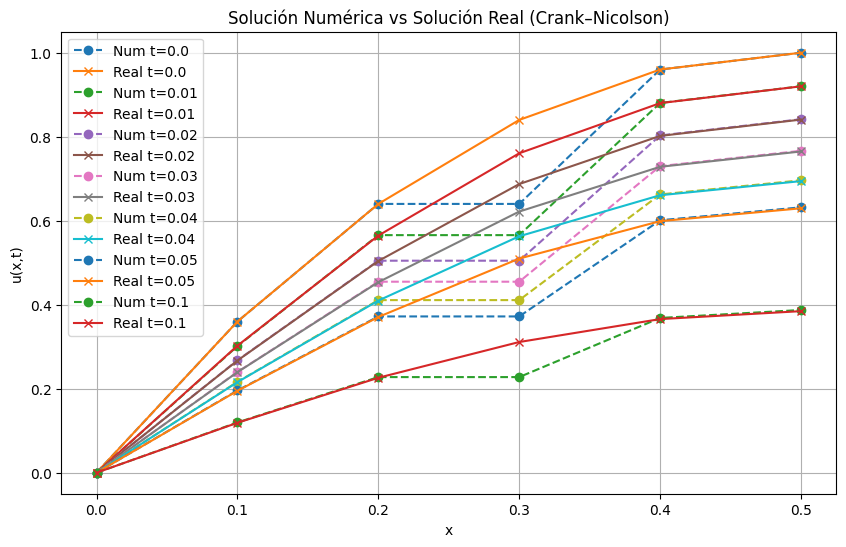

In [18]:
plt.figure(figsize=(10,6))

for t in solucion_real.keys():
    plt.plot(x_plot, u_num_dict[t], '--o', label=f'Num t={t}')
    plt.plot(x_plot, solucion_real[t], '-x', label=f'Real t={t}')

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solución Numérica vs Solución Real (Crank–Nicolson)")
plt.grid(True)
plt.legend()
plt.show()

Calculamos el error

In [19]:
error_table = []
error_max = 0

for t in solucion_real.keys():
    errors = []
    for i in range(len(x_plot)):
        e = abs(u_num_dict[t][i] - solucion_real[t][i])
        errors.append(round(e, 6))
        if e > error_max:
            error_max = e
    error_table.append([t] + errors)

In [20]:
# La tabla de error:

headers = ["t"] + [f"x={x}" for x in x_plot]
print(tabulate(error_table, headers=headers, tablefmt="grid"))

print("\nError máximo absoluto:", error_max)

+------+-------+---------+---------+---------+---------+---------+
|    t |   x=0 |   x=0.1 |   x=0.2 |   x=0.3 |   x=0.4 |   x=0.5 |
+======+=======+=========+=========+=========+=========+=========+
| 0    |     0 |  0      |  0      |  0.2    |  0      |  0      |
+------+-------+---------+---------+---------+---------+---------+
| 0.01 |     0 |  0.001  |  0.0011 |  0.1949 |  0.0004 |  0.0002 |
+------+-------+---------+---------+---------+---------+---------+
| 0.02 |     0 |  0.0005 |  0.0007 |  0.1825 |  0.0011 |  0.0009 |
+------+-------+---------+---------+---------+---------+---------+
| 0.03 |     0 |  0.0005 |  0.0011 |  0.167  |  0.0016 |  0.0016 |
+------+-------+---------+---------+---------+---------+---------+
| 0.04 |     0 |  0.0007 |  0.0012 |  0.152  |  0.0019 |  0.002  |
+------+-------+---------+---------+---------+---------+---------+
| 0.05 |     0 |  0.0008 |  0.0013 |  0.1378 |  0.0021 |  0.0023 |
+------+-------+---------+---------+---------+---------+------

El método de Crank-Nicolson nos arroja resultados muy cercanos a la solución real. El error máximo absoluto en este caso fue muy pequeño (del orden de $10^{-3}$).  

El método reproduce con gran fidelidad la difusión del calor en el intervalo $[0,1]$, incluso con un mallado grueso $(h=0.1$).
